In [ ]:
#PYTHON使用CSV文件

In [1]:
import csv
import os

In [1]:
in_path='e:/material/'
out_path='e:/result/'

In [3]:
filename='cashflow.csv'

In [4]:
if os.path.exists(out_path+filename):
    print('ok')
else:
    print('no')

no


In [5]:
with open(out_path+filename,encoding='utf-8') as f:
    reader=csv.DictReader(f)
    for i in reader:
        print(i['code'])

FileNotFoundError: [Errno 2] No such file or directory: 'e:/result/cashflow.csv'

In [ ]:
#numpy绘图实验

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def f(x):
    return (x**3-5*x**2+9)

In [8]:
print(f(3))

-9


In [10]:
def exp(x):
    return (np.e**x)

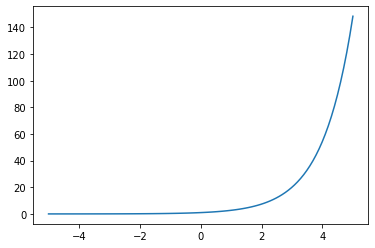

In [11]:
x=np.linspace(-5,5,num=100)
y=exp(x)
plt.plot(x,y)

d:\ana\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
d:\ana\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
d:\ana\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


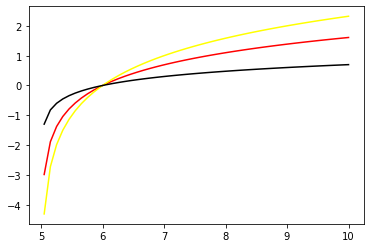

In [12]:
a=np.linspace(0,10,100,endpoint=True)
y1=np.log(x)
y2=np.log2(x)
y3=np.log10(x)
plt.plot(a,y1,'red',a,y2,'yellow',a,y3,'black')

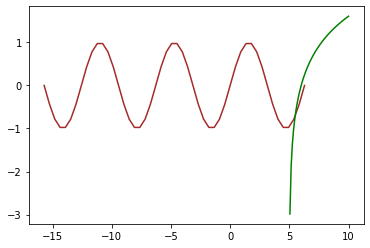

In [13]:
plt.plot(np.linspace(-5*np.pi,2*np.pi),np.sin(np.linspace(-5*np.pi,2*np.pi)),'brown',a,y1,'green')

In [14]:
#股票分析系统实验运行

In [ ]:
import StockAnalysisSystem.api as sa
sa.main()

Initializing Stock Analysis System with project path : D:\personal-interest\jupyter
Clear proxy: HTTP_PROXY
Execution failed on sql 'select name, reason, comments, last_update from gray_table': no such table: gray_table
Execution failed on sql 'select name, reason, comments, last_update from focus_table': no such table: focus_table
Execution failed on sql 'select name, reason, comments, last_update from black_table': no such table: black_table
Mongodb config error.
localhost:27017: [WinError 10061] 由于目标计算机积极拒绝，无法连接。
Traceback (most recent call last):
  File "d:\ana\lib\site-packages\StockAnalysisSystem\core\Database\DatabaseEntry.py", line 90, in config_nosql_db
    self.__mongo_db_client.server_info()
  File "d:\ana\lib\site-packages\pymongo\mongo_client.py", line 1868, in server_info
    session=session)
  File "d:\ana\lib\site-packages\pymongo\database.py", line 730, in command
    read_preference, session) as (sock_info, slave_ok):
  File "d:\ana\lib\contextlib.py", line 112, in __

In [ ]:
python 图像库PIL详解
PIL详细文档

The most important class in the Python Imaging Library is the Image class, defined in the module with the same name. You can create instances of this class in several ways; either by loading images from files, processing other images, or creating images from scratch.
解释：Python映像库中最重要的类是Image类，定义在具有相同名称的模块中。您可以通过多种方式创建该类的实例；通过从文件加载图像，处理其他图像，或从头创建图像/。

1、简单实用Image函数
从文件加载图像，用Image函数的open方法
>>> from PIL import Image
>>> im = Image.open("hopper.ppm")

如果成功，这个函数将返回一个图像对象。现在您可以使用实例属性来检查文件内容
>>> from __future__ import print_function
>>> print(im.format, im.size, im.mode)
PPM (512, 512) RGB

format属性识别图形的源，若图片不是从文件读取的将显示None；
size属性是一个包含宽度和高度的二元数组(以像素为单位)；
mode属性定义了图像中波段的数量和名称，以及像素类型和深度
save 要保存文件，请使用Image类的save()方法
常见的模式是“L”(亮度)用于灰度图像，“RGB”用于真正的彩色图像，以及“CMYK”用于预压图像

一旦有了Image类的实例，就可以使用该类定义的方法来处理和操作图像
>>> im.show() #显示刚刚加载的图像

show()的标准版本不是很有效，因为它将图像保存到一个临时文件中，并调用xv实用程序来显示图像。如果你没有安装xv，它甚至不会工作。但是，当它确实起作用时，它对于调试和测试非常方便。

例子：创建图片的缩略图
im = Image.open('bossimg.jpg') 
print im.format,im.size,im.mode
size = (30,40)
im.thumbnail(size) #大小是元组长和宽
im.save('boss.png','PNG') #以png格式保存缩略图

2、读写图片

1）将文件转换成JPEG
from __future__ import print_function
import os, sys
from PIL import Image

for infile in sys.argv[1:]:
f, e = os.path.splitext(infile)
outfile = f + ".jpg"
if infile != outfile:
try:
Image.open(infile).save(outfile)
except IOError:
print("cannot convert", infile)

2）创建JPEG缩略图
from __future__ import print_function
import os, sys
from PIL import Image

size = (128, 128)

for infile in sys.argv[1:]:
outfile = os.path.splitext(infile)[0] + ".thumbnail"
if infile != outfile:
try:
im = Image.open(infile)
im.thumbnail(size)
im.save(outfile, "JPEG")
except IOError:
print("cannot create thumbnail for", infile)

3）识别图像文件
from __future__ import print_function
import sys
from PIL import Image

for infile in sys.argv[1:]:
try:
with Image.open(infile) as im:
print(infile, im.format, "%dx%d" % im.size, im.mode)
except IOError:
pass

3、剪切、粘贴和合并图像
1）从图像中复制子矩形
box = (100, 100, 400, 400)
region = im.crop(box)
该区域由一个4元组定义，其中坐标为(左、上、右、下)。Python映像库使用左上角的(0,0)坐标系统。还要注意，坐标是指像素之间的位置，所以上面例子中的区域正好是300x300像素。

2）处理一个子矩形，并将其粘贴回去
region = region.transpose(Image.ROTATE_180)
im.paste(region, box)

当粘贴区域返回时，区域的大小必须与给定区域完全匹配。此外，该区域不能扩展到图像之外。然而，原始图像的模式和区域不需要匹配。如果不这样做，在粘贴之前，该区域会自动转换(详情请参阅下面的颜色转换部分)。

3）滚动一个图像
def roll(image, delta):
"Roll an image sideways"

xsize, ysize = image.size

delta = delta % xsize
if delta == 0: return image

part1 = image.crop((0, 0, delta, ysize))
part2 = image.crop((delta, 0, xsize, ysize))
part1.load()
part2.load()
image.paste(part2, (0, 0, xsize-delta, ysize))
image.paste(part1, (xsize-delta, 0, xsize, ysize))

return image

对于更高级的技巧，paste方法还可以使用透明掩码作为可选参数。在该掩码中，值255表示粘贴图像在该位置是不透明的(也就是说，粘贴的图像应该被使用)。值0表示粘贴的图像是完全透明的。中间值表示不同级别的透明性。例如，粘贴一个RGBA图像并使用它作为掩码会粘贴图像的不透明部分，而不是它的透明背景。

4）分裂和合并图像
r, g, b = im.split()
im = Image.merge("RGB", (b, g, r))

注意，对于单个带图像，split()返回图像本身。要使用单独的颜色组合，您可能需要先将图像转换为“RGB”。

4、几何变换
PIL.Image。Image类包含了调整()和旋转()图像的方法。前者采用一个元组来给出新的尺寸，后者是逆时针方向的角度。
The PIL.Image.Image class contains methods to resize() and rotate() an image. The former takes a tuple giving the new size, the latter the angle in degrees counter-clockwise.

1)简单的几何变换
out = im.resize((128, 128))
out = im.rotate(45) # degrees counter-clockwise

要在90度的步骤中旋转图像，您可以使用rotate()方法或转置()方法。后者也可以用来在水平或垂直轴上翻转图像。
To rotate the image in 90 degree steps, you can either use the rotate() method or the transpose() method. The latter can also be used to flip an image around its horizontal or vertical axis.
2)移位一个图像
out = im.transpose(Image.FLIP_LEFT_RIGHT)
out = im.transpose(Image.FLIP_TOP_BOTTOM)
out = im.transpose(Image.ROTATE_90)
out = im.transpose(Image.ROTATE_180)
out = im.transpose(Image.ROTATE_270)

一种更一般的图像转换可以通过transform()方法进行。

5、颜色转换
Python图像库允许使用convert()方法在不同的像素表示之间转换图像

模式之间的转换
from PIL import Image
im = Image.open("hopper.ppm").convert("L")

库支持每个受支持的模式和“L”和“RGB”模式之间的转换。要在其他模式之间转换，您可能需要使用中间图像(通常是“RGB”图像)。

6、图象增强
Python图像库提供了许多方法和模块，可用于增强图像。
1）过滤
ImageFilter模块包含许多预先定义的增强过滤器，可以与filter()方法一起使用
from PIL import ImageFilter
out = im.filter(ImageFilter.DETAIL)
2）点运算
point()方法可以用来翻译图像的像素值(如图像对比度处理)。在大多数情况下，期望一个参数的函数对象可以传递给这个方法。每个像素都是按照该功能进行处理的。
# multiply each pixel by 1.2
out = im.point(lambda i: i * 1.2)

使用上述技术，您可以快速地将任何简单的表达式应用到图像中。还可以将point()和paste()方法组合为有选择地修改图像

3）处理单个的图像频段
# split the image into individual bands
source = im.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
im = Image.merge(im.mode, source)

创建掩码的语法：
imout = im.point(lambda i: expression and 255)

4）增强或者优化处理
Python只计算逻辑表达式的部分，以确定结果，并返回作为表达式结果检查的最后一个值。因此，如果上面的表达式为false(0)，Python就不会查看第二个操作数，因此返回0。否则,它将返回255

from PIL import ImageEnhance

enh = ImageEnhance.Contrast(im)
enh.enhance(1.3).show("30% more contrast")

7、图像序列

Python映像库包含对图像序列(也称为动画格式)的一些基本支持。支持的序列格式包括FLI / FLC、GIF和一些实验格式。TIFF文件也可以包含多个帧。
当打开一个序列文件时，PIL会自动加载序列中的第一帧。您可以使用seek和tell方法在不同的帧之间移动
1）读序列
from PIL import Image

im = Image.open("animation.gif")
im.seek(1) # skip to the second frame

try:
while 1:
im.seek(im.tell()+1)
im.show() 
# do something to im
except EOFError:
pass # end of sequence

如本例中所示，当序列结束时，您将得到一个EOFError异常
下面的类让您使用for - statement来对序列进行循环
Using the ImageSequence Iterator class
from PIL import ImageSequence
for frame in ImageSequence.Iterator(im):
# ...do something to frame...

8、图像打印
Python映像库包括用于在Postscript打印机上打印图像、文本和图形的函数
下面是一个简单的列子简答说明
from PIL import Image
from PIL import PSDraw

im = Image.open("hopper.ppm")
title = "hopper"
box = (1*72, 2*72, 7*72, 10*72) # in points

ps = PSDraw.PSDraw() # default is sys.stdout
ps.begin_document(title)

# draw the image (75 dpi)
ps.image(box, im, 75)
ps.rectangle(box)

# draw title
ps.setfont("HelveticaNarrow-Bold", 36)
ps.text((3*72, 4*72), title)

ps.end_document()

9、更多的读取图像
您可以使用类似文件的对象而不是文件名。对象必须实现read()、seek()和tell()方法，并以二进制模式打开。
1）从打开的文件中读取
from PIL import Image
with open("hopper.ppm", "rb") as fp:
im = Image.open(fp)

2）从字符串阅读
import StringIO

im = Image.open(StringIO.StringIO(buffer))

注意，在读取图像标题之前，库会对文件进行重卷(使用查找(0))。此外，当读取图像数据时，也会使用seek(通过load方法)。如果图像文件嵌入到一个较大的文件中，比如tar文件，那么可以使用ContainerIO或TarIO模块来访问它
3）从tar压缩文件中读取
from PIL import Image, TarIO

fp = TarIO.TarIO("Tests/images/hopper.tar", "hopper.jpg")
im = Image.open(fp)

10、控制译码器
一些解码器允许您在读取文件时对图像进行操作。在创建缩略图(通常速度比质量更重要)和打印到单色激光打印机(只需要一个灰度版本的图像)时，这通常可以用来加速解码。
The draft() method manipulates an opened but not yet loaded image so it as closely as possible matches the given mode and size. This is done by reconfiguring the image decoder.
1) 阅读草稿模式
这只适用于JPEG和MPO文件
from PIL import Image
from __future__ import print_function
im = Image.open(file)
print("original =", im.mode, im.size)

im.draft("L", (100, 100))
print("draft =", im.mode, im.size)

上述执行打印出类似下面：
original = RGB (512, 512)
draft = L (128, 128)

In [ ]:
from PIL import Image as img
im=img.open('33.jpg')
im.show()
print(im.format, im.size, im.mode)
out = im.resize((1798, 3000))
out.show()

JPEG (899, 1500) RGB


In [ ]:
#学习操作selenium

In [2]:
from selenium import webdriver as we
from selenium.webdriver.common.keys import Keys as ky

In [3]:
driver=we.Firefox()
driver.implicitly_wait(30)
driver.maximize_window()
driver.get("http://demo.magentocommerce.com/")

search_field=driver.find_element_by_name("q")
search_field.clear()

search_field.send_keys("phones")
search_field.submit()
#//*[@id="content"]/text()[58]
products=driver.find_elements_by_xpath("//h2[@class='product-name']/a")
print("Found"+str(len(products))+"products:")

for i in products:
    print(i.text)
    
driver.quit()

NoSuchWindowException: Message: Browsing context has been discarded


In [4]:
driver=we.Firefox()
driver.implicitly_wait(30)
driver.maximize_window()

url='http://www.xbiquge.la/17/17008/8847394.html  '
#//*[@id="content"] //*[@id="content"]
driver.get(url)
#products=driver.find_elements_by_xpath("//*[@id="content"]/text()")
data = driver.find_element_by_id("content").text
print(type(data)) 

<class 'str'>


In [5]:
print(data)

    相较于赵慕白第一次碰到的猎杀者，如今的这一头猎杀者身形更加纤细的同时，灰黑色流线型的肌肉让它拥有更强的爆发力！

    “当啷！”

    清脆的钢铁交鸣声响起，赵慕白手中的掠星刃枪竟然如同软鞭一般，在抽打在丧尸的身上后被反冲力弯曲了回来，精巧无比的格挡住了猎杀者的双爪！

    掠星刃枪由星界能量凝聚而成，所以拥有着寻常武器所不具有的特性，既可以当做龙枪也可以当做长枪使用，刚柔并济是赵慕白手中这把掠星刃枪的特点之一！

    站在队伍的最前方，这一刻赵慕白彻底化身为绞肉机，掠星刃枪在赵慕白的操控下快速旋转，但凡被其刮到的丧尸各种残肢断臂纷飞！

    “桀！”

    猎杀者一击不中之后立马隐匿在尸群当中，但一双骨节狰狞的利爪之上却被赵慕白给直接用掠星刃枪给劈掉了一大半！

    “快！快！快！跟上！”

    班长一看似乎有活下去的希望，浑身上下不知道从哪涌出了无穷无尽的力量，手中步枪连连咆哮，点射掉靠近过来的丧尸，跟在赵慕白后面寸步不离！

    “班长！我没子弹了！”跟在最后面的一名战士突然喊道！

    “接着！”

    这名班长将仅存的两个弹匣的其中一个扔了过去，可惜刚刚扔过去没等这名士兵接住，猎杀者竟然再次出现！

    “噗嗤！”

    断了一半的利爪并没有妨碍到猎杀者的杀戮，另一只完好无损的大手干脆利落的从士兵的胸膛穿过！

    一颗猩红色的心脏出现在了猎杀者的手中！

    “大个！”

    班长目呲俱裂的看着眼前的这一幕，这已经是第四名倒在这个怪物手下的士兵了！转眼自己这个班一半的士兵都牺牲了！

    “跟紧我，不要分神！”

    最前方的赵慕白手中掠星刃枪如新月般向丧尸横扫过去，所过之处丧尸尽皆被抽成了两半！

    “所有人跟上！所有手雷全部都给我扔出去！”

    班长听后虎躯一震，也顾不得抹掉眼角的泪花，将已经没有了子弹的步枪快速上弹。

    “轰！”“轰！”“轰！”

    整整七颗手雷同时爆炸开来，巨大的爆炸威力让黑压压的尸群出现了一片空白，污血夹杂着肉糜如同下雨一般，哗啦啦的落了一地！

    “再坚持住，还有不到二十米的距离！”

    赵慕白望着前方已经稀松的丧尸群后心中一松，长时间凝聚掠星刃枪是极其消耗体力的，即便是现在的赵慕白也仅仅只能保持两个小时而已！

In [7]:
#Xpayh定位讲解，链接    https://www.jianshu.com/p/530b1cb0871b
#https://www.cnblogs.com/hanmk/p/8997786.html

In [14]:
import pandas as pd
import html5lib

In [16]:
url='http://quote.eastmoney.com/center/whsc.html'
data=pd.read_html(url)
print(len(data))

ImportError: html5lib not found, please install it

In [6]:
for i in data:
    print(i)

    0  1    2  3    4  5    6  7     8  9   \
0  今开：  -  最高：  -  涨停：  -  换手：  -  成交量：  -   
1  昨收：  -  最低：  -  跌停：  -  量比：  -  成交额：  -   

                                                  10 11     12 13  
0  市盈(动)  动态市盈率：-  总市值除以全年预估净利润，例如当前一季度净利润1000万,则...  -   总市值：  -  
1                                                市净：  -  流通市值：  -  
        0       1       2
0  加载中...  加载中...  加载中...
        0       1       2
0  加载中...  加载中...  加载中...
             0                                                  1
0  08-28  2020                  ●  预约披露日  2020年半年报预约2020年08月28日披露
1  08-07  2020  ●  股权质押  截止2020年08月07日质押总比例0.02%，质押总股数318.05万股...
2  08-04  2020    ●  大宗交易  2020年08月04日共有1笔大宗交易，成交量120万股，成交额1704万元
        0         1         2         3
0      公募        私募        社保      QFII
1   1家(1)     0家(0)     1家(1)     0家(0)
2    股东情况  20-03-31  20-03-31  19-12-31
3    股东户数    39.74万    39.74万    32.29万
4  较上期(%)    16.567    16.567     7.636
Empty DataFrame
Columns: [名称, 涨跌幅, 领涨股]
Index: []